In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.5)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])
print("\n")
print("columns involved : ",df.columns)

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


columns involved :  Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
"""CHECKING FOR NULL VALUES"""

print(df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [7]:
"""CHECKING FOR DUPLICATE VALUES"""

print(df[df.duplicated()])

Empty DataFrame
Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
Index: []


In [8]:
"""DROPPING UNNECESSARY COLUMNS"""

df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [11]:
"""CHANGING COLUMN NAME FROM EXITED TO CHURNED"""

df.rename(columns={"Exited":"Churned"},inplace=True)
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

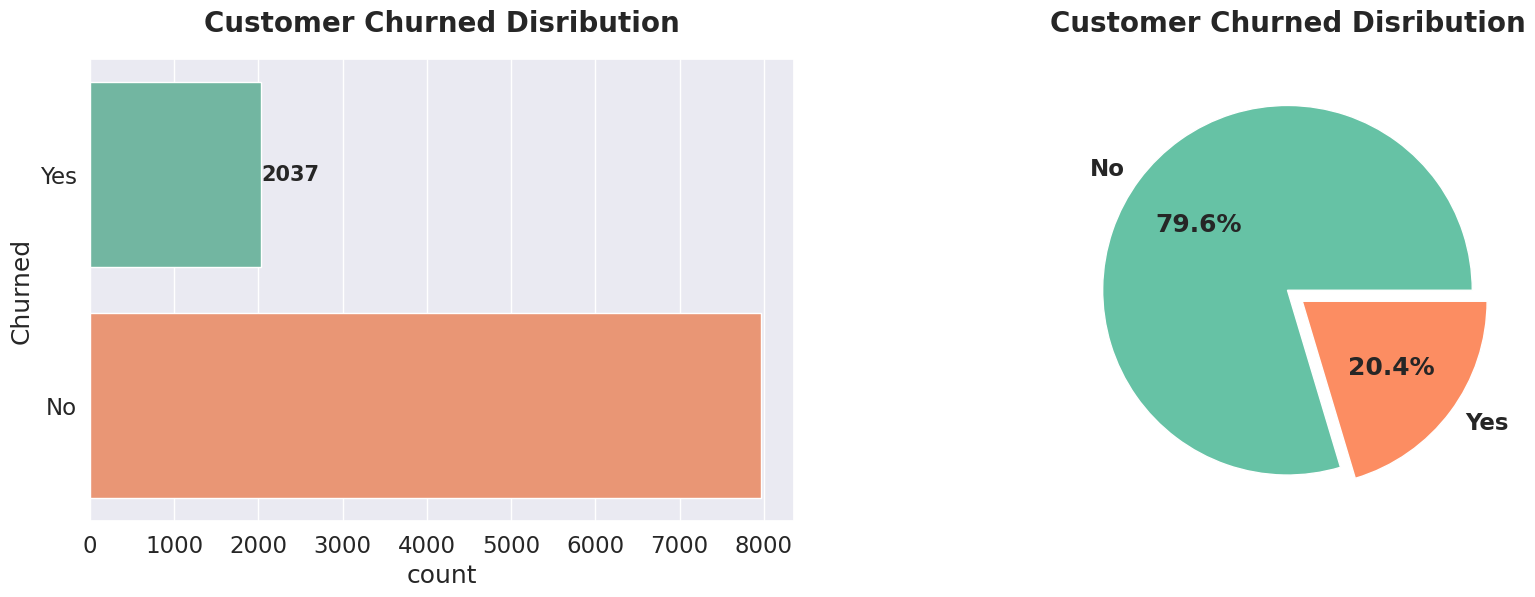

In [16]:
count = df["Churned"].value_counts()

plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
ax=sns.countplot(df["Churned"],palette="Set2")
ax.bar_label(ax.containers[0],fontweight="black",size=15)
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"},explode=[0,0.1])
plt.title("Customer Churned Disribution",fontweight="black",size=20,pad=20)
plt.show()

In [17]:
def countplot(column):
    plt.figure(figsize=(15,5))
    ax = sns.countplot(x=column, data=df, hue="Churned",palette="Set2")
    for value in ax.patches:
        percentage = "{:.1f}%".format(100*value.get_height()/len(df[column]))
        x = value.get_x() + value.get_width() / 2 - 0.05
        y = value.get_y() + value.get_height()
        ax.annotate(percentage, (x,y), fontweight="black",size=15)

    plt.title(f"Customer Churned by {column}",fontweight="black",size=20,pad=20)
    plt.show()

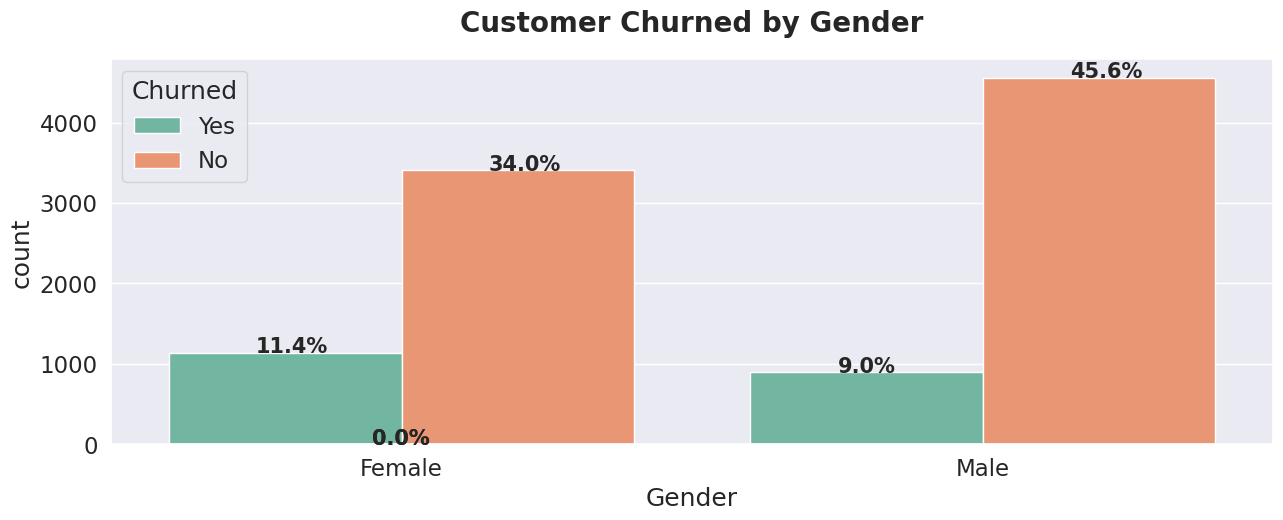

In [18]:
countplot("Gender")

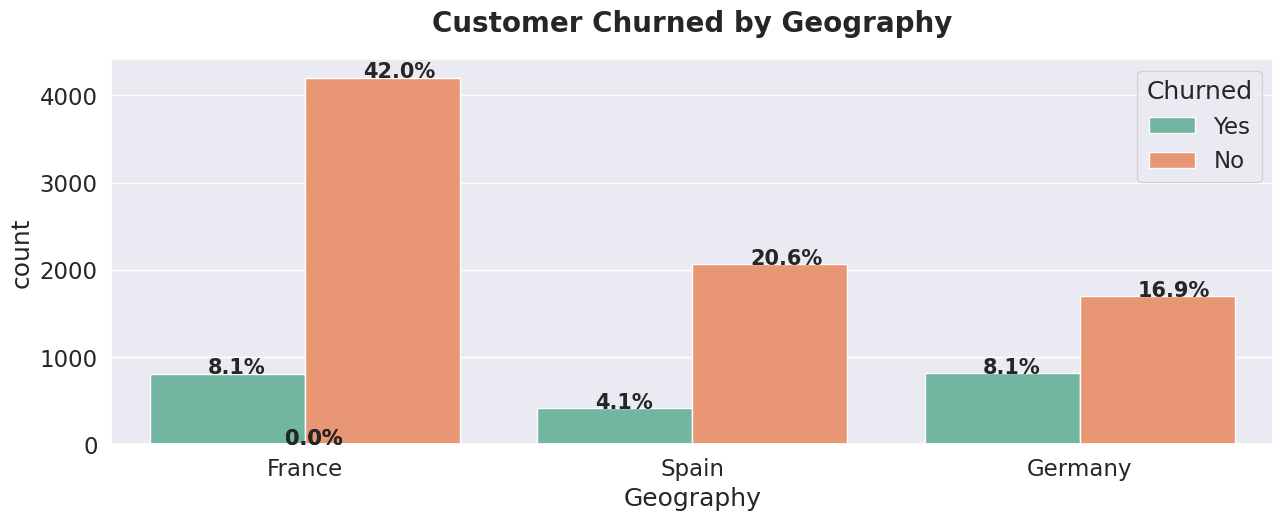

In [19]:
countplot("Geography")

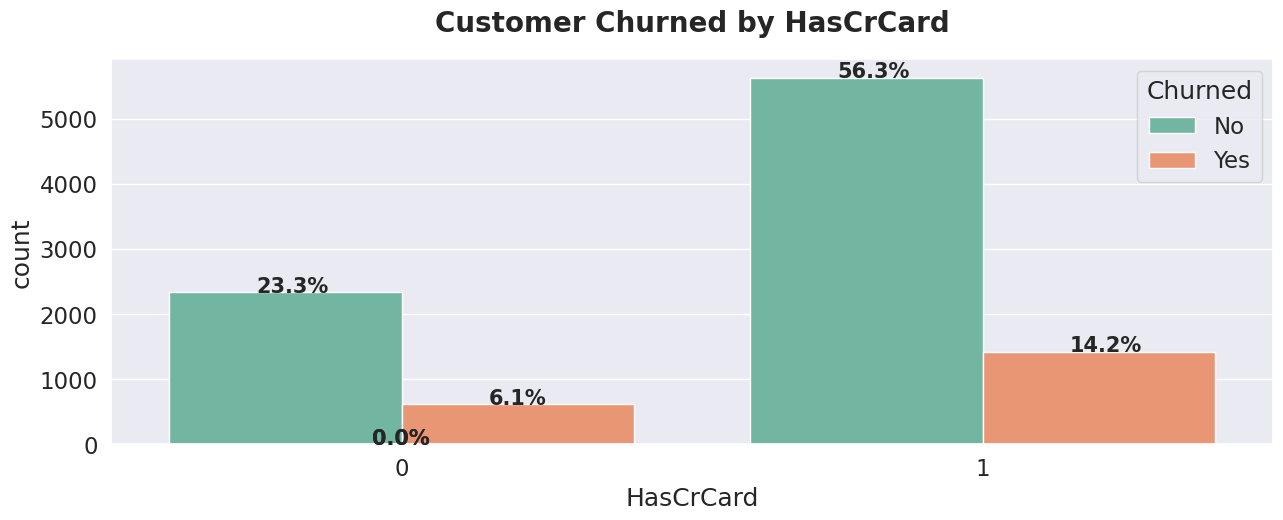

In [20]:
countplot("HasCrCard")

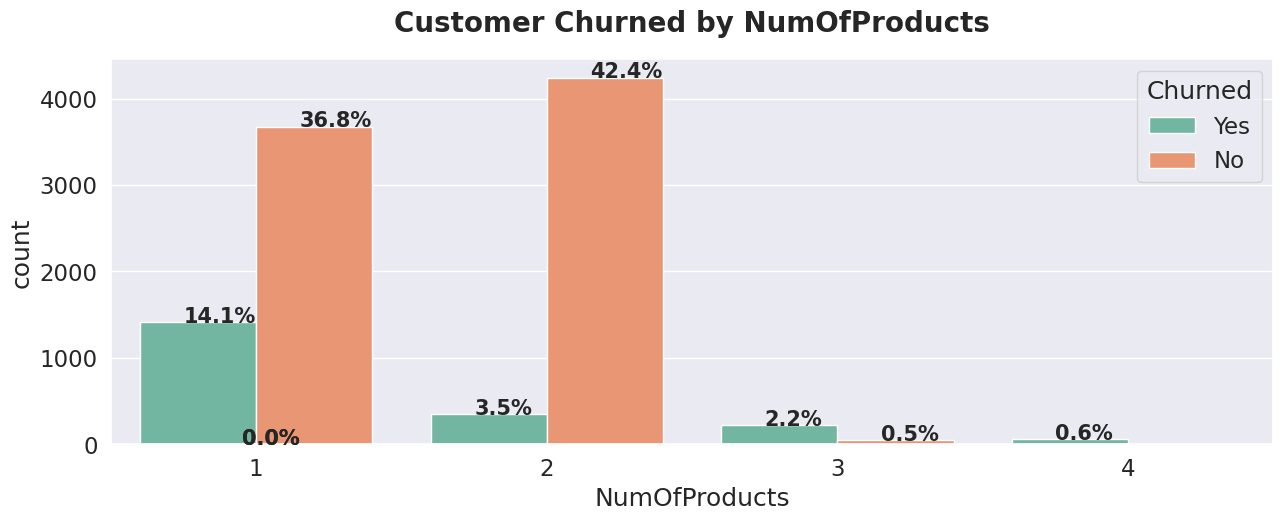

In [21]:
countplot("NumOfProducts")

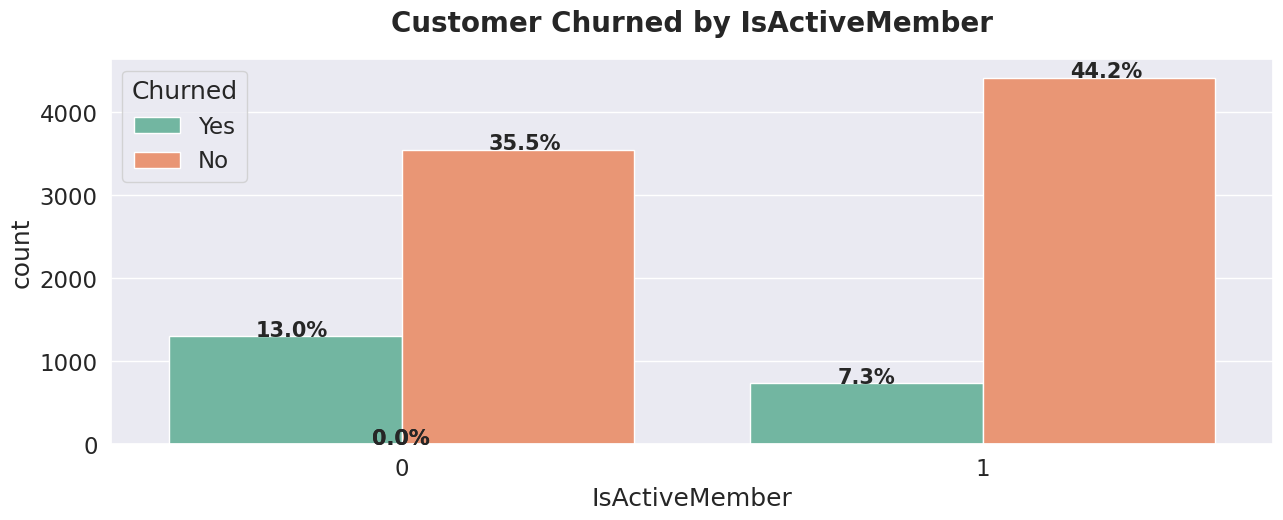

In [22]:
countplot("IsActiveMember")

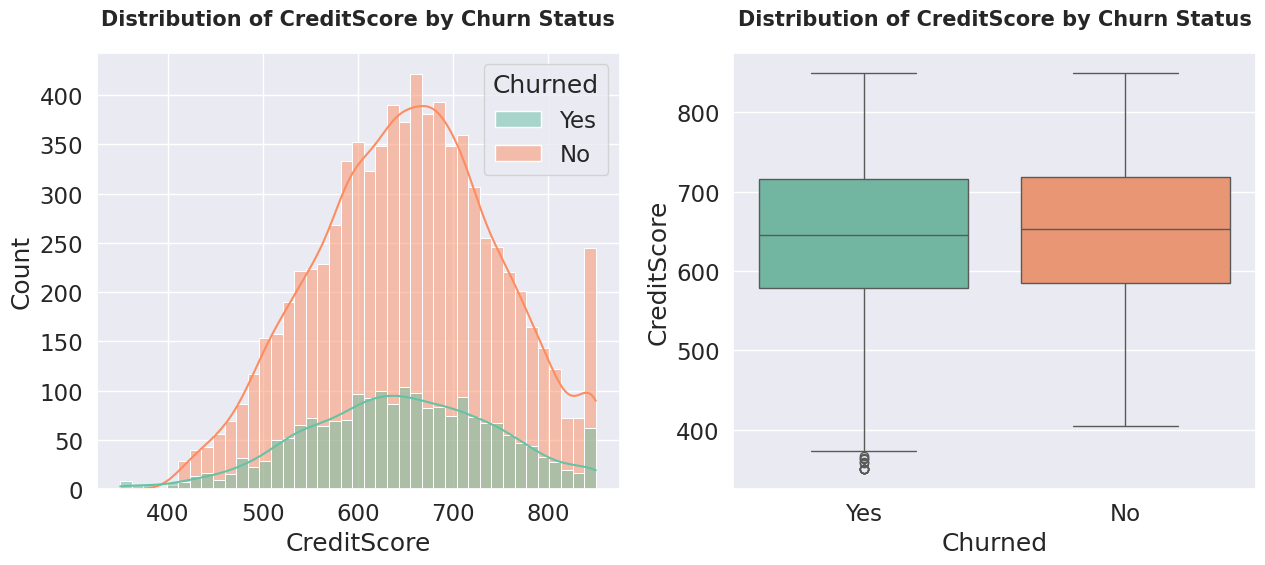

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

def continous_plot(column):
    plt.figure(figsize=(13,6))

    # Histogram plot
    plt.subplot(1,2,1)
    sns.histplot(x=column, hue="Churned", data=df, kde=True, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    # Box plot
    plt.subplot(1,2,2)
    sns.boxplot(x="Churned", y=column, data=df, palette="Set2")
    plt.title(f"Distribution of {column} by Churn Status", fontweight="black", pad=20, size=15)

    plt.tight_layout()
    plt.show()

# Call the function to plot the distribution of CreditScore
continous_plot("CreditScore")

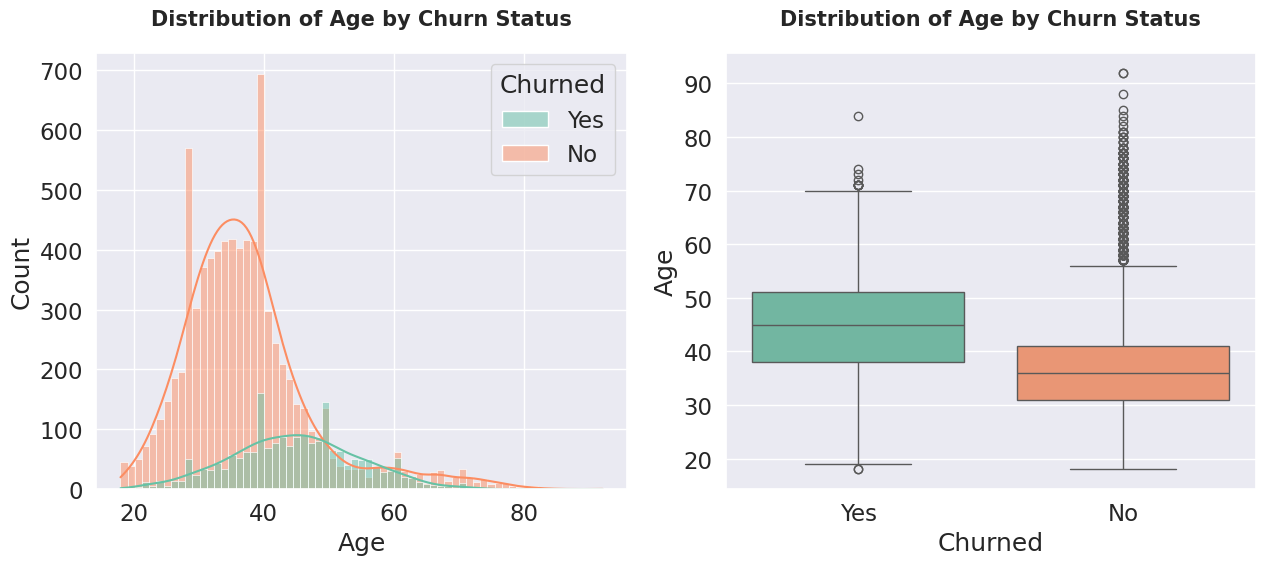

In [26]:
continous_plot("Age")


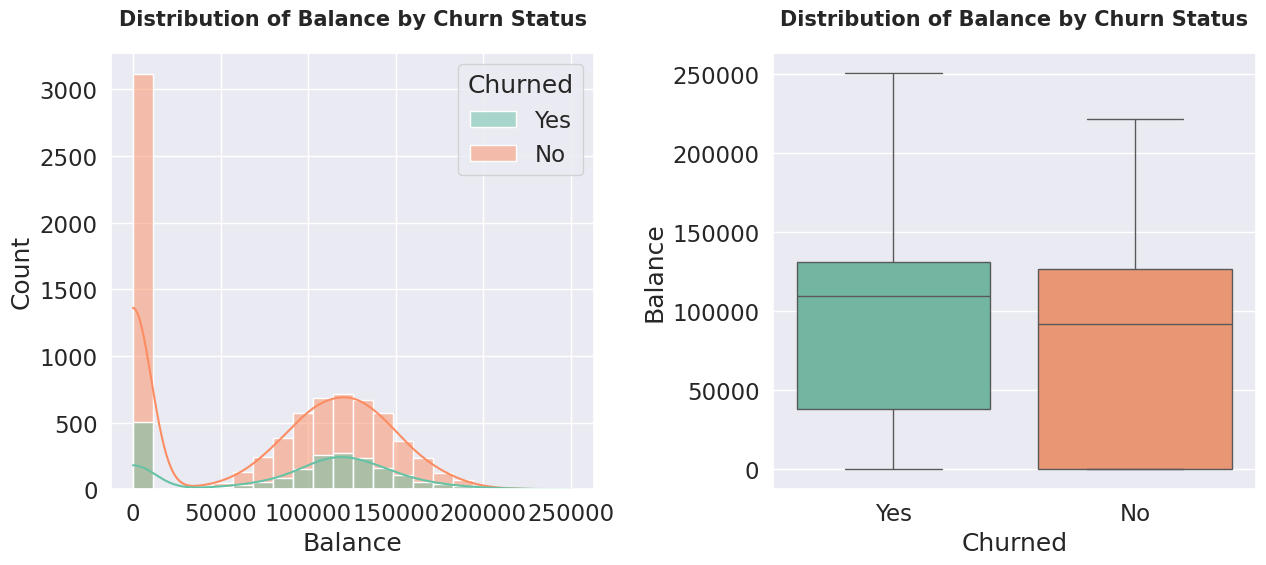

In [27]:
continous_plot("Balance")

In [31]:
"""More than 3000 customers are having their account balance equal to zero.
Customers with zero balance are more likely to deactivate their account.
Excluding the zero value we can observe a normal distribution. So don't have to use any other techniques.
Note:-
We can do Feature Engineering by grouping the customers with account balance equal to 0 and balance more than 0 separately."""

"More than 3000 customers are having their account balance equal to zero.\nCustomers with zero balance are more likely to deactivate their account.\nExcluding the zero value we can observe a normal distribution. So don't have to use any other techniques.\nNote:-\nWe can do Feature Engineering by grouping the customers with account balance equal to 0 and balance more than 0 separately."

In [28]:
## FEATURE ENGINEERING


conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]

values =     ["One product","Two Products","More Than 2 Products"]
df["Total_Products"] = np.select(conditions,values)

df.drop(columns="NumOfProducts", inplace=True)

In [29]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]
df["Account_Balance"] = np.select(conditions, values)
df.drop(columns="Balance",inplace=True)

In [30]:
old_age = df["Age"]     ##Storing the previous Age values to compare these values with the transformed values.
df["Age"] = np.log(df["Age"])

In [33]:
""" ONE HOT ENCODING & CATEGORICAL ENCODING CATEGORICAL COLUMNS """

cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())



Unique Values in Geography column is: ['France' 'Spain' 'Germany']
Unique Values in Gender column is: ['Female' 'Male']
Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']


In [34]:
df = pd.get_dummies(columns=cat_cols, data=df)

df.head(10)

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,Yes,True,False,False,True,False,False,True,False,False,True
1,608,3.713572,1,0,1,112542.58,No,False,False,True,True,False,False,True,False,True,False
2,502,3.737670,8,1,0,113931.57,Yes,True,False,False,True,False,True,False,False,True,False
3,699,3.663562,1,0,0,93826.63,No,True,False,False,True,False,False,False,True,False,True
4,850,3.761200,2,1,1,79084.10,No,False,False,True,True,False,False,True,False,True,False
5,645,3.784190,8,1,0,149756.71,Yes,False,False,True,False,True,False,False,True,True,False
6,822,3.912023,7,1,1,10062.80,No,True,False,False,False,True,False,False,True,False,True
7,376,3.367296,4,1,0,119346.88,Yes,False,True,False,True,False,True,False,False,True,False
8,501,3.784190,4,0,1,74940.50,No,True,False,False,False,True,False,False,True,True,False
9,684,3.295837,2,1,1,71725.73,No,True,False,False,False,True,False,True,False,True,False


In [35]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [36]:
df["Gender_Female"].replace({False:0,True:1},inplace=True)
df.head(10)

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,1,True,False,False,1,False,False,True,False,False,True
1,608,3.713572,1,0,1,112542.58,0,False,False,True,1,False,False,True,False,True,False
2,502,3.737670,8,1,0,113931.57,1,True,False,False,1,False,True,False,False,True,False
3,699,3.663562,1,0,0,93826.63,0,True,False,False,1,False,False,False,True,False,True
4,850,3.761200,2,1,1,79084.10,0,False,False,True,1,False,False,True,False,True,False
5,645,3.784190,8,1,0,149756.71,1,False,False,True,0,True,False,False,True,True,False
6,822,3.912023,7,1,1,10062.80,0,True,False,False,0,True,False,False,True,False,True
7,376,3.367296,4,1,0,119346.88,1,False,True,False,1,False,True,False,False,True,False
8,501,3.784190,4,0,1,74940.50,0,True,False,False,0,True,False,False,True,True,False
9,684,3.295837,2,1,1,71725.73,0,True,False,False,0,True,False,True,False,True,False


In [37]:
df.iloc[:,6:] = df.iloc[:,6:].replace({False:0,True:1})
df.head(10)

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,3.737670,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,3.713572,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,3.737670,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,3.663562,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,3.761200,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0
5,645,3.784190,8,1,0,149756.71,1,0,0,1,0,1,0,0,1,1,0
6,822,3.912023,7,1,1,10062.80,0,1,0,0,0,1,0,0,1,0,1
7,376,3.367296,4,1,0,119346.88,1,0,1,0,1,0,1,0,0,1,0
8,501,3.784190,4,0,1,74940.50,0,1,0,0,0,1,0,0,1,1,0
9,684,3.295837,2,1,1,71725.73,0,1,0,0,0,1,0,1,0,1,0


In [38]:
df['Churned'].value_counts()

Churned
0    7963
1    2037
Name: count, dtype: int64

In [39]:
""" TRAIN-TEST SPLIT """
X = df.drop(columns=["Churned"])
y = df["Churned"]

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
print("Shape of x_train is:",x_train.shape)
print("Shape of x_test is: ",x_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of x_train is: (8000, 16)
Shape of x_test is:  (2000, 16)
Shape of y_train is: (8000,)
Shape of y_test is:  (2000,)


In [41]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male',
       'Total_Products_More Than 2 Products', 'Total_Products_One product',
       'Total_Products_Two Products', 'Account_Balance_More Than zero Balance',
       'Account_Balance_Zero Balance'],
      dtype='object')

In [42]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to overcome the class imbalance in the target variable
smt = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smt.fit_resample(x_train, y_train)
print(x_train_resampled.shape, y_train_resampled.shape)



(12736, 16) (12736,)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score




# Define the RandomForest model
rfc = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 20, 25],
    'max_features': ['auto', 'sqrt', 'log2']

}

# Perform Randomized Search
random_search = RandomizedSearchCV(rfc, param_distributions=param_grid, n_iter=50, cv=3, random_state=42)
random_search.fit(x_train_resampled, y_train_resampled)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)





Best parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': 20}
Best score: 0.8765815943354895


In [46]:
# Train the model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(x_train_resampled, y_train_resampled)

# Make predictions on the training and test sets
y_train_pred = best_rf_model.predict(x_train_resampled)
y_test_pred = best_rf_model.predict(x_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)


# Print the results
print("Accuracy Score of Model on Training Data is =>", round(accuracy_train * 100, 2), "%")
print("Accuracy Score of Model on Testing Data is =>", round(accuracy_test * 100, 2), "%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy Score of Model on Training Data is => 99.98 %
Accuracy Score of Model on Testing Data is => 85.05 %
Confusion Matrix:
 [[1478  117]
 [ 182  223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1595
           1       0.66      0.55      0.60       405

    accuracy                           0.85      2000
   macro avg       0.77      0.74      0.75      2000
weighted avg       0.84      0.85      0.85      2000



In [47]:
print("F1 Score of the Model is =>",f1_score(y_test,y_test_pred,average="micro"))
print("Recall Score of the Model is =>",recall_score(y_test,y_test_pred,average="micro"))
print("Precision Score of the Model is =>",precision_score(y_test,y_test_pred,average="micro"))

F1 Score of the Model is => 0.8505
Recall Score of the Model is => 0.8505
Precision Score of the Model is => 0.8505


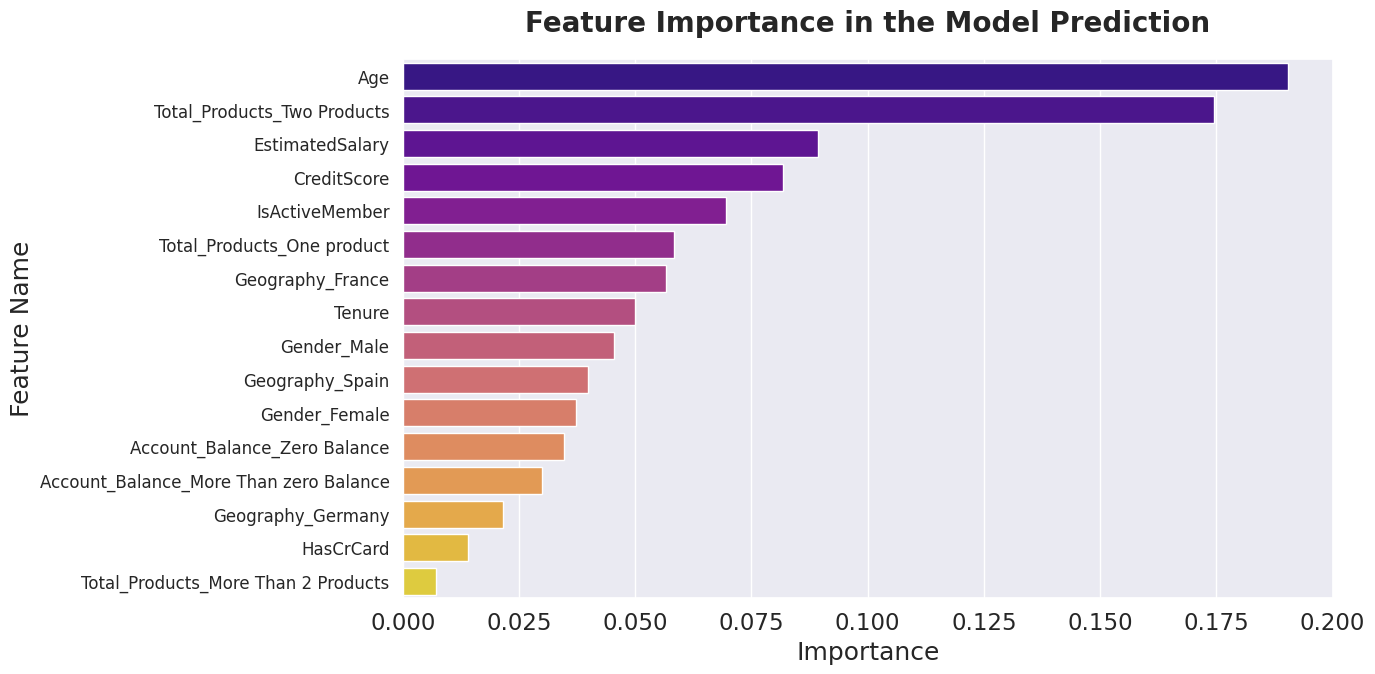

In [51]:
"""  Finding Importance of Features in RandomForest Model.  """

imp_df = pd.DataFrame({"Feature Name": x_train.columns,
                       "Importance": best_rf_model.feature_importances_})
features = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()

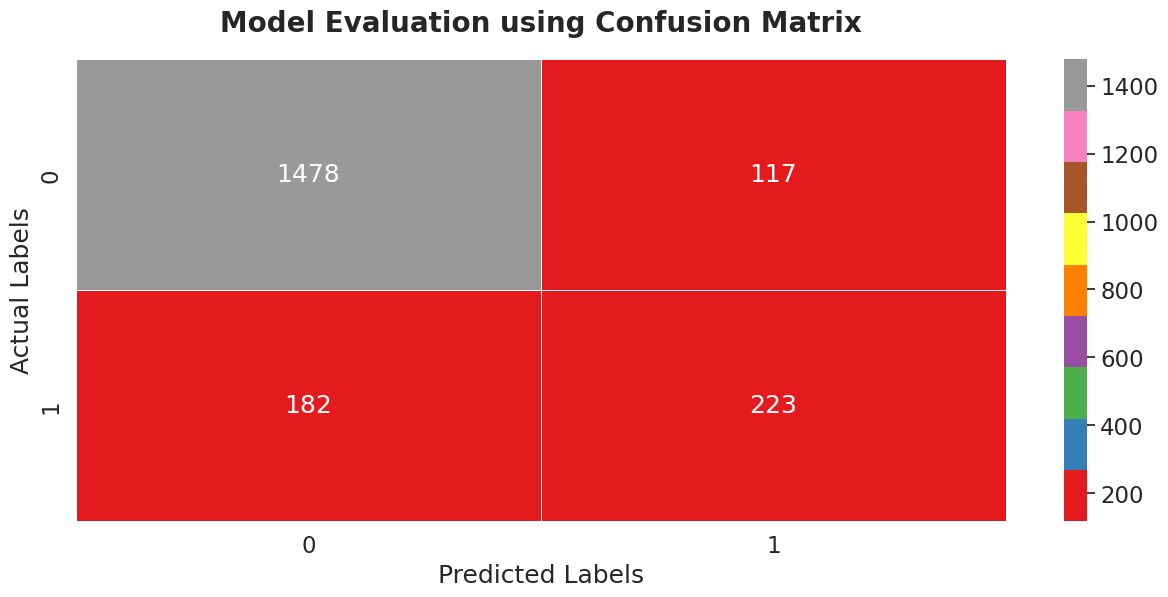

In [55]:
""" Confustion Matrix """


cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize=(15,6))
sns.heatmap(data=cm, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix",fontsize=20,pad=20,fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

ROC AUC Score: 0.8512875885289679


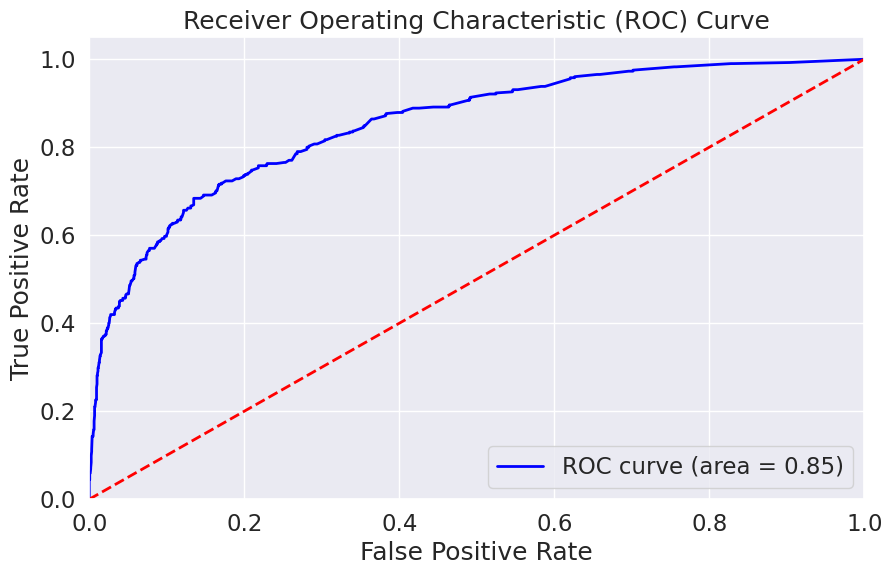

In [67]:
y_pred_prob = best_rf_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print("ROC AUC Score:", roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [57]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score



xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameters to search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [ 10, 15, 20]
}






In [58]:
# Perform Randomized Search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=50, scoring='accuracy', cv=3, verbose=1)
random_search.fit(x_train, y_train)

# Best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters:", best_params)
print("Best score:", best_score)



Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.01}
Best score: 0.850124510880251


In [59]:
# Train the model with best parameters
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(x_train, y_train)

# Predictions and evaluation
y_pred = best_xgb_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8615
Confusion Matrix:
 [[1553   42]
 [ 235  170]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.80      0.42      0.55       405

    accuracy                           0.86      2000
   macro avg       0.84      0.70      0.73      2000
weighted avg       0.86      0.86      0.84      2000



In [61]:
print("F1 Score of the Model is =>", f1_score(y_test, y_pred, average="micro"))
print("Recall Score of the Model is =>", recall_score(y_test, y_pred, average="micro"))
print("Precision Score of the Model is =>", precision_score(y_test, y_pred, average="micro"))

F1 Score of the Model is => 0.8615
Recall Score of the Model is => 0.8615
Precision Score of the Model is => 0.8615


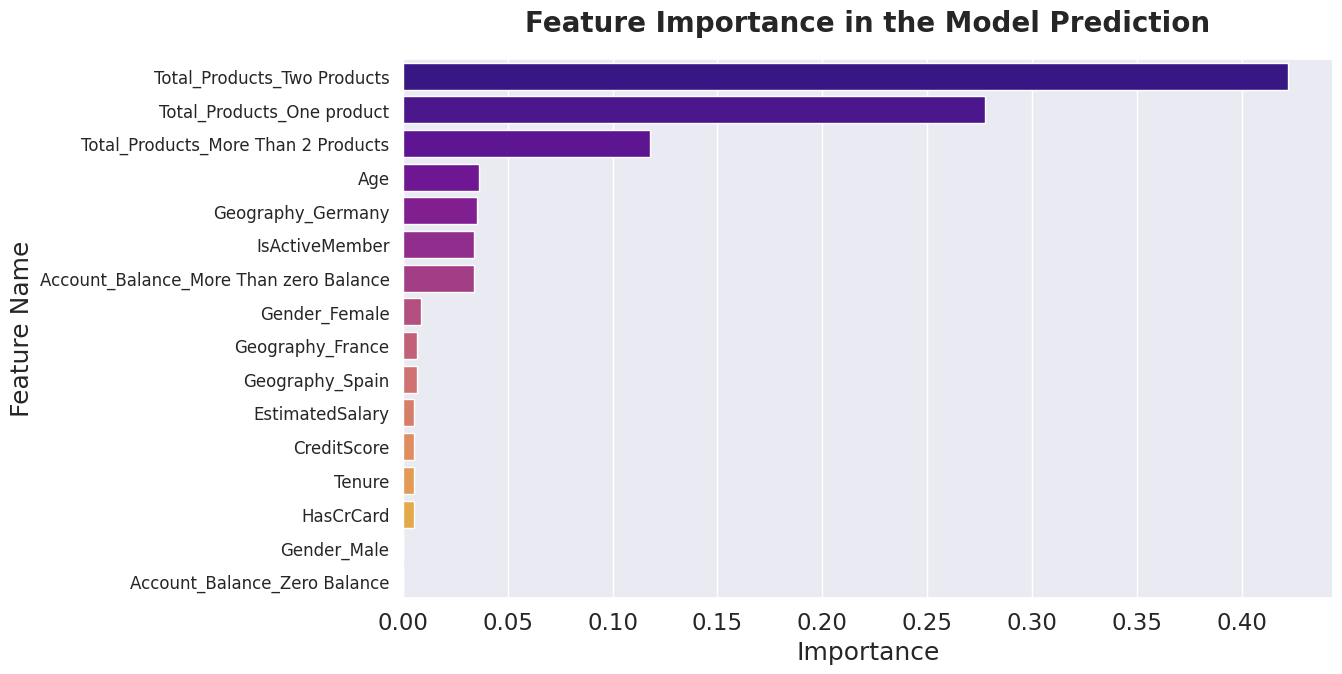

In [63]:
"""  Finding Importance of Features in XGBOOST Model.  """
imp_df = pd.DataFrame({"Feature Name": x_train.columns,
                       "Importance": best_xgb_model.feature_importances_})
features = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=20, pad=20)
plt.yticks(size=12)
plt.show()


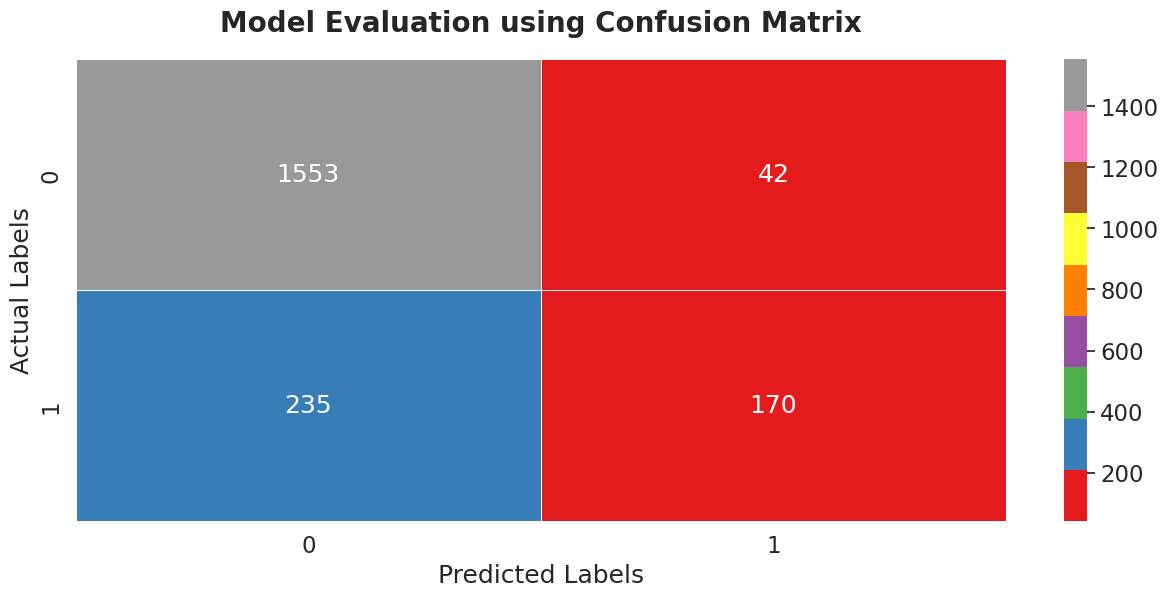

In [64]:
""" CONFUSION MATRIX FOR XGBOOST ALGORITHM """

plt.figure(figsize=(15,6))
sns.heatmap(data=conf_matrix, linewidth=.5, annot=True, fmt="g", cmap="Set1")
plt.title("Model Evaluation using Confusion Matrix", fontsize=20, pad=20, fontweight="black")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()


ROC AUC Score: 0.8463036495220404


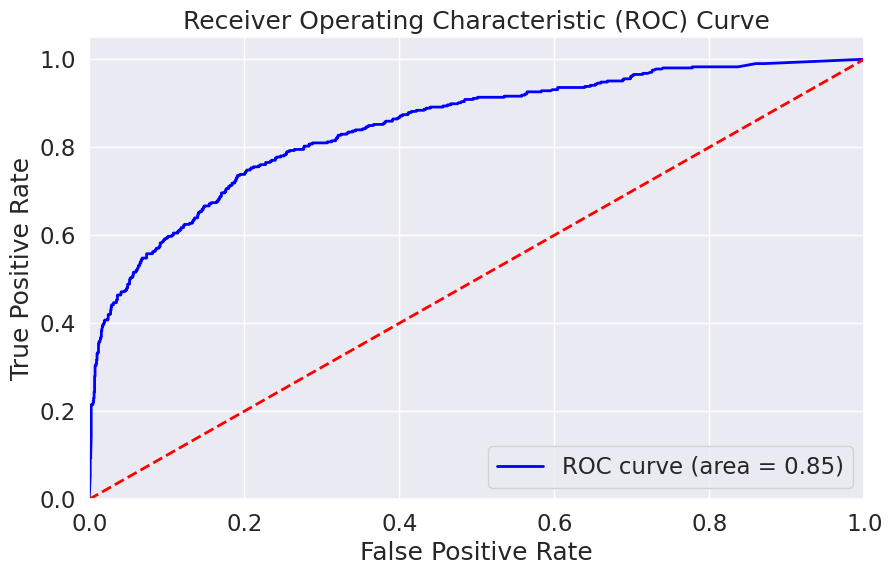

In [66]:
 """ ROC AUC CURVE ANALYSIS FOR XGBOOST ALGORITHM"""

y_pred_prob = best_xgb_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

print("ROC AUC Score:", roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()